In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def power_law(wl, A, k, C):
    return A*(wl/(1+z))**k+C

def graph_more():
    plt.axvline(6563, label=r'H$\alpha$', color='red', linewidth=0.5)
    plt.axvline(4861, label=r'H$\beta$', color='cyan', linewidth=0.5)
    plt.xlabel('Rest $\lambda$ ($\AA$)'); plt.legend(loc=1); plt.show()

z = 0.083

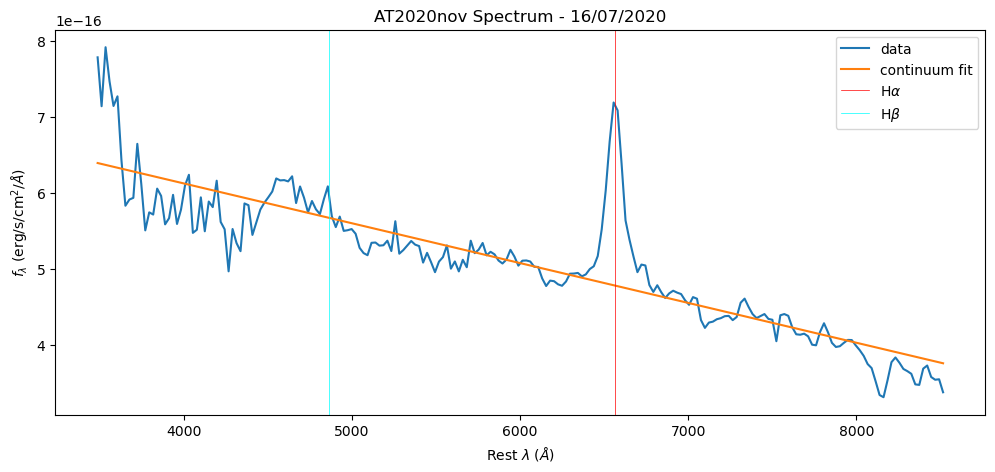

In [4]:
wl, flux, err = np.loadtxt('spec.ascii', unpack=True)

#params = np.array([-4.24299309e-12,  2.26376993e-04,  4.25147743e-12])
continuum = curve_fit(power_law, wl, flux, maxfev=10000)
pl_params = continuum[0]

plt.figure(figsize=(12, 5))
plt.plot(wl/(1+z), flux, label='data')
plt.plot(wl/(1+z), power_law(wl, *pl_params), label='continuum fit')
#plt.xlim(5700, 6300)
plt.ylabel('$f_{\lambda}$ (erg/s/cm$^2$/$\AA$)')
plt.title('AT2020nov Spectrum - 16/07/2020')
graph_more()

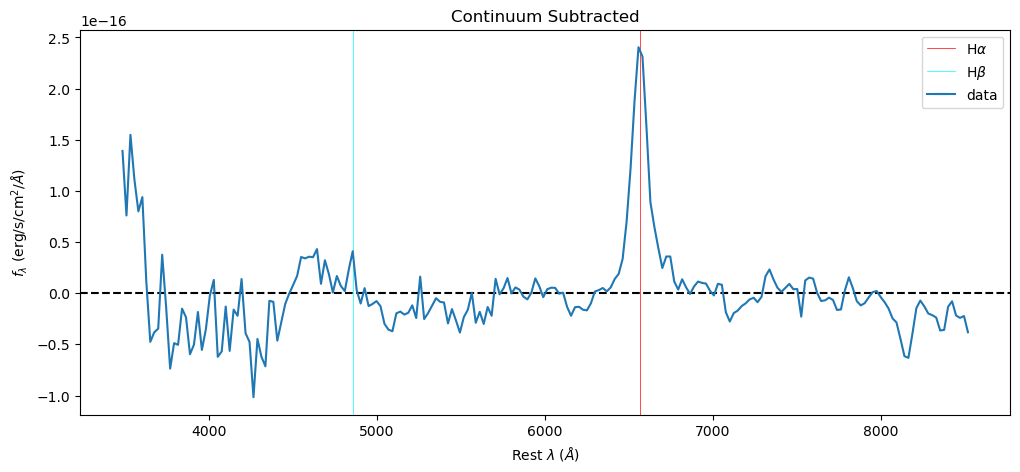

In [13]:
plt.figure(figsize=(12, 5))
plt.axhline(0, ls='--', c='k')
plt.errorbar(wl/(1+z), flux - power_law(wl, *pl_params), xerr=err, label='data')
plt.ylabel('$f_{\lambda}$ (erg/s/cm$^2$/$\AA$)')
plt.title('Continuum Subtracted')
graph_more()

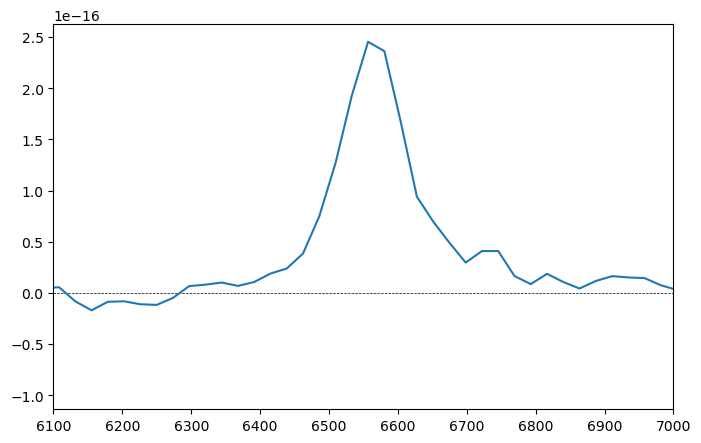

In [22]:
plt.figure(figsize=(8, 5))
plt.axhline(0, ls='--', c='k', lw=0.5)
plt.plot(wl/(1+z), flux - power_law(wl, *pl_params) + 0.05e-16, label='data')
plt.xlim(6100, 7000); plt.show()

In [23]:
pl_params

array([-5.23768954e-20,  1.00000026e+00,  8.21820035e-16])